In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import regex as re

In [2]:
df=pd.read_csv('Census Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*25)

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
*************************
Workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
*************************
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: count, Length: 21647, dtype: int64
*************************
Education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th      

### EDA

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<Axes: xlabel='Age', ylabel='count'>

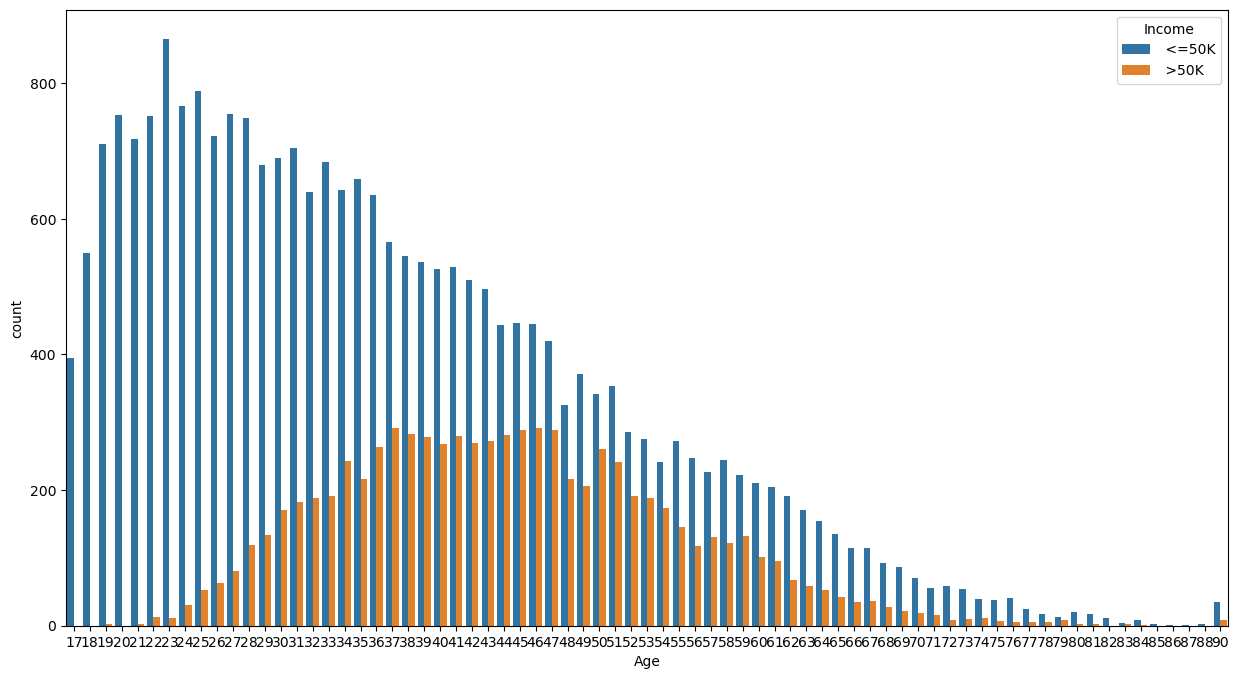

In [6]:
plt.figure(figsize=(15,8))
sns.countplot(df,x='Age',hue='Income')

<Axes: xlabel='Age', ylabel='count'>

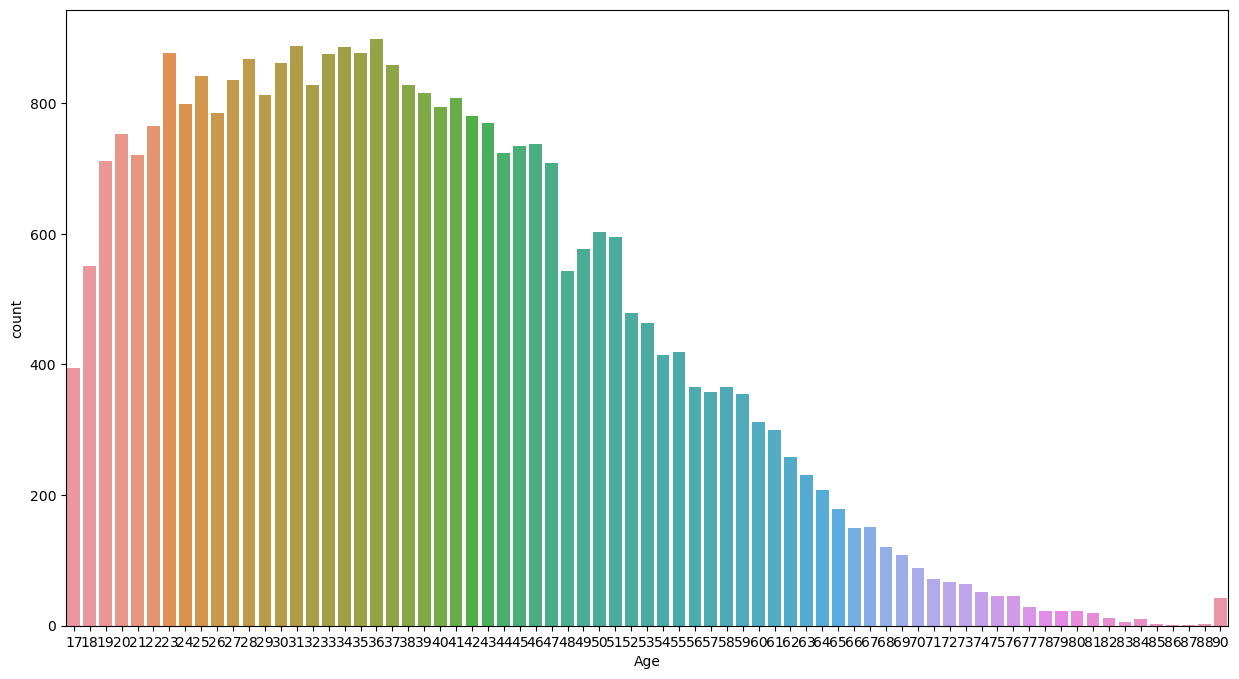

In [7]:
plt.figure(figsize=(15,8))
sns.countplot(df,x='Age')

<Axes: xlabel='Workclass', ylabel='count'>

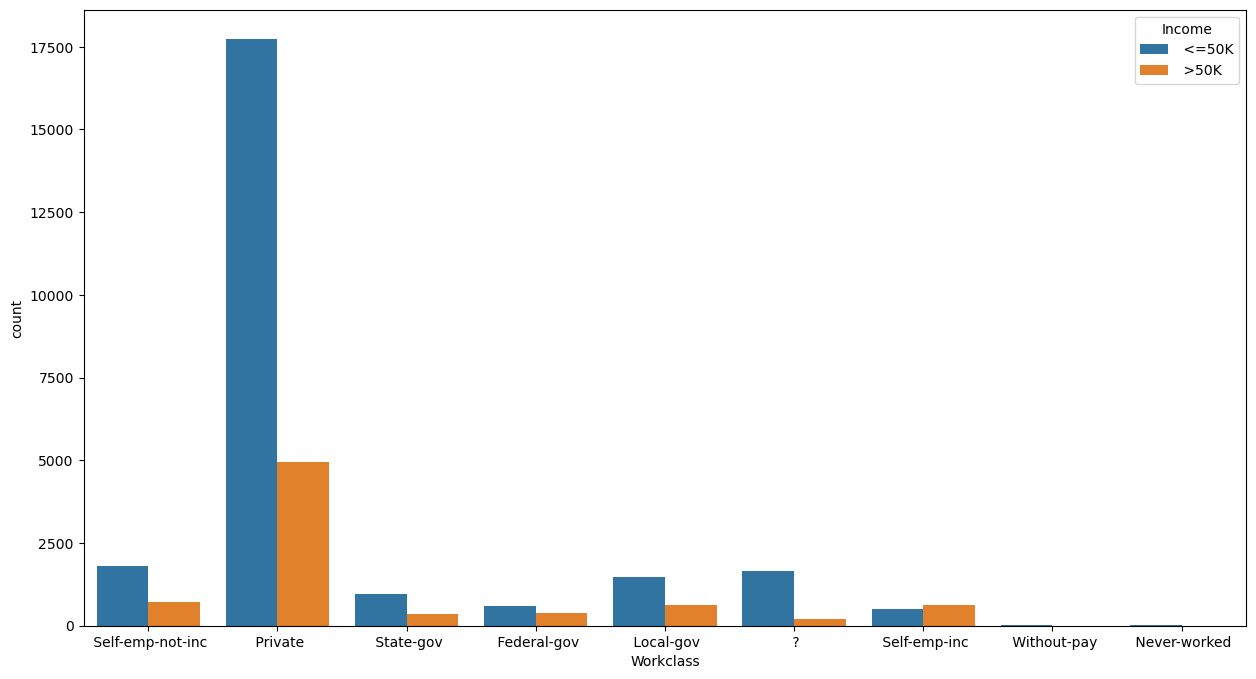

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(df,x='Workclass',hue='Income')

In [9]:
(df['Fnlwgt']=='?').sum()

0

<Axes: xlabel='Fnlwgt', ylabel='Count'>

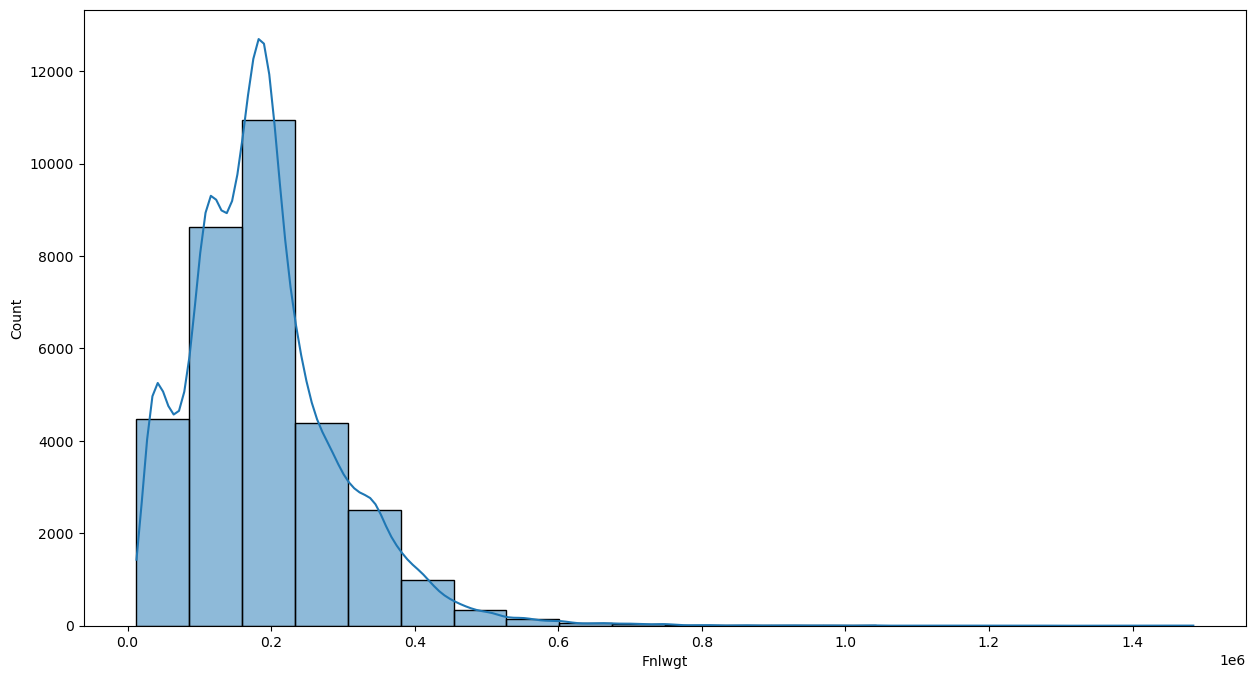

In [10]:
plt.figure(figsize=(15,8))
sns.histplot(df,x='Fnlwgt',bins=20,kde=True)

<Axes: xlabel='Education', ylabel='count'>

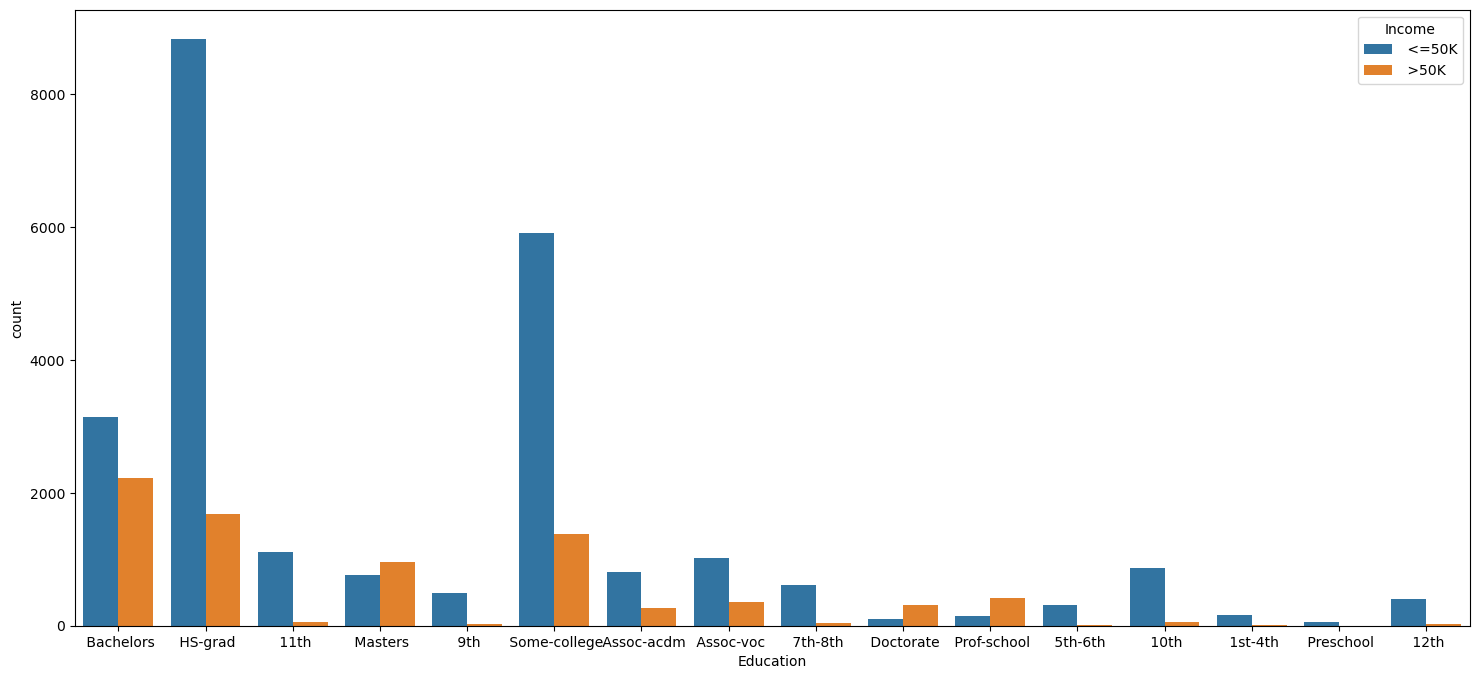

In [11]:
plt.figure(figsize=(18,8))
sns.countplot(df,x='Education',hue='Income')

In [12]:
df['Education_num']=df['Education_num'].astype('int')

<Axes: xlabel='Education', ylabel='count'>

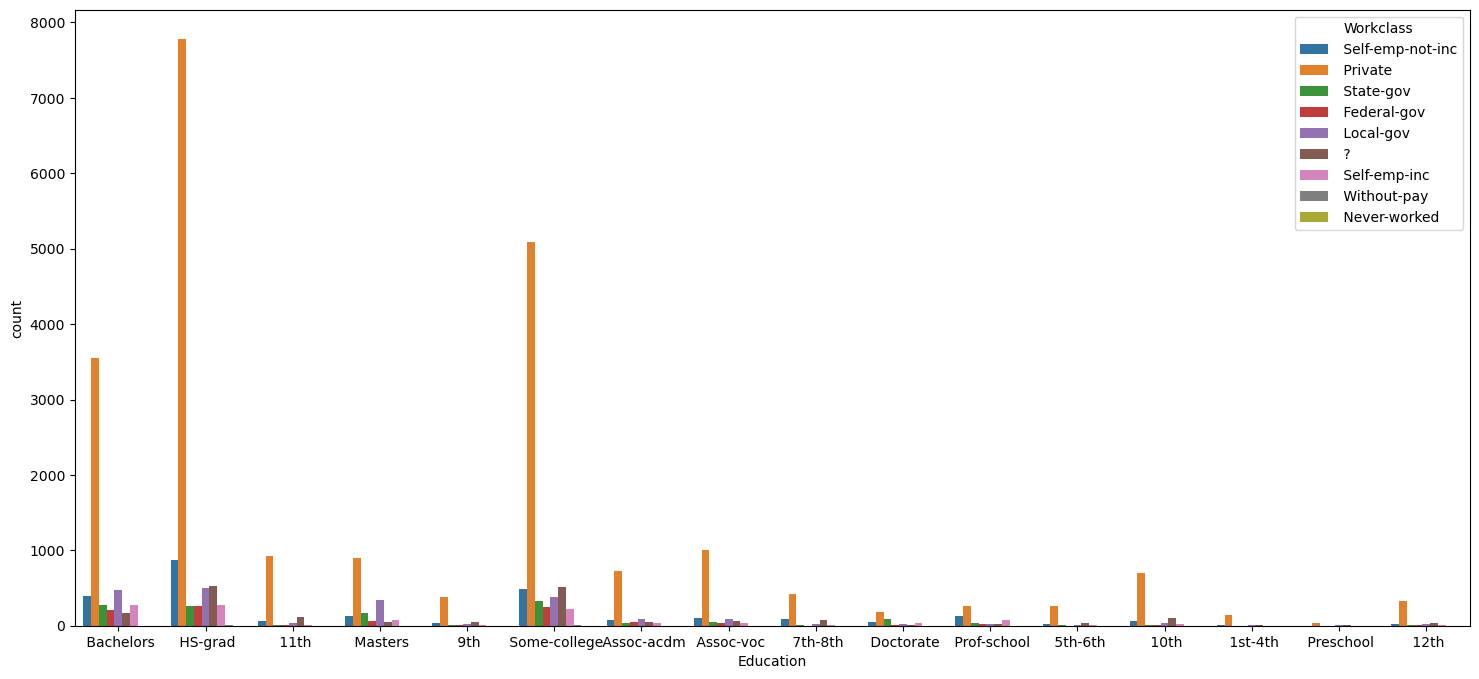

In [13]:
plt.figure(figsize=(18,8))
sns.countplot(df,x='Education',hue='Workclass')

<Axes: xlabel='Occupation', ylabel='count'>

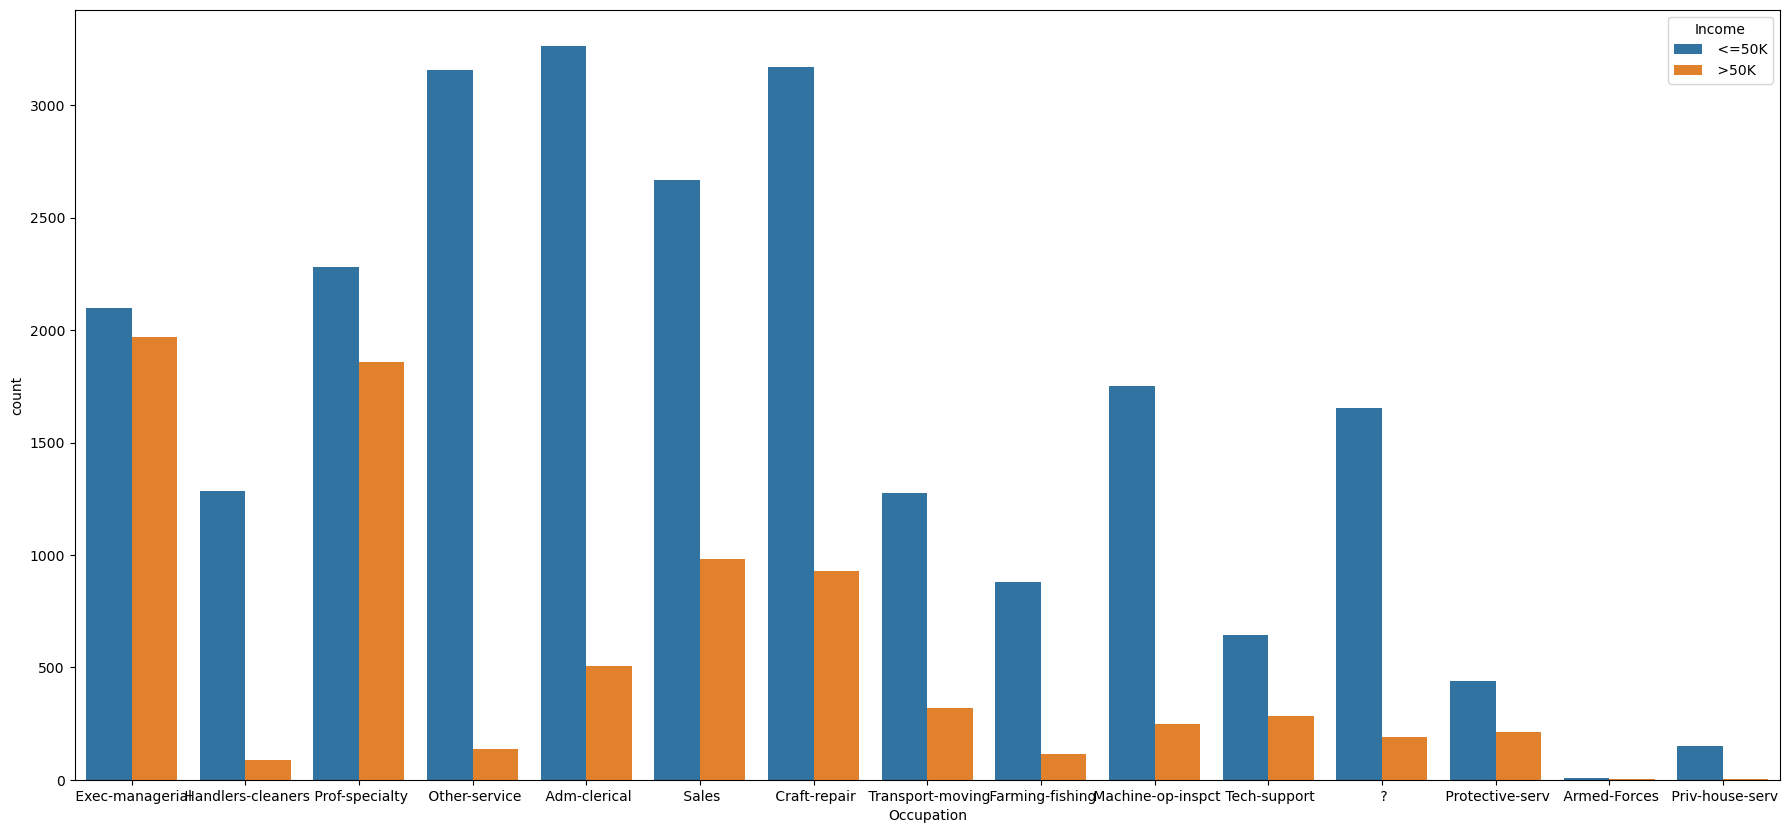

In [14]:
plt.figure(figsize=(22,10))
sns.countplot(df,x='Occupation',hue='Income')

<Axes: xlabel='Sex', ylabel='count'>

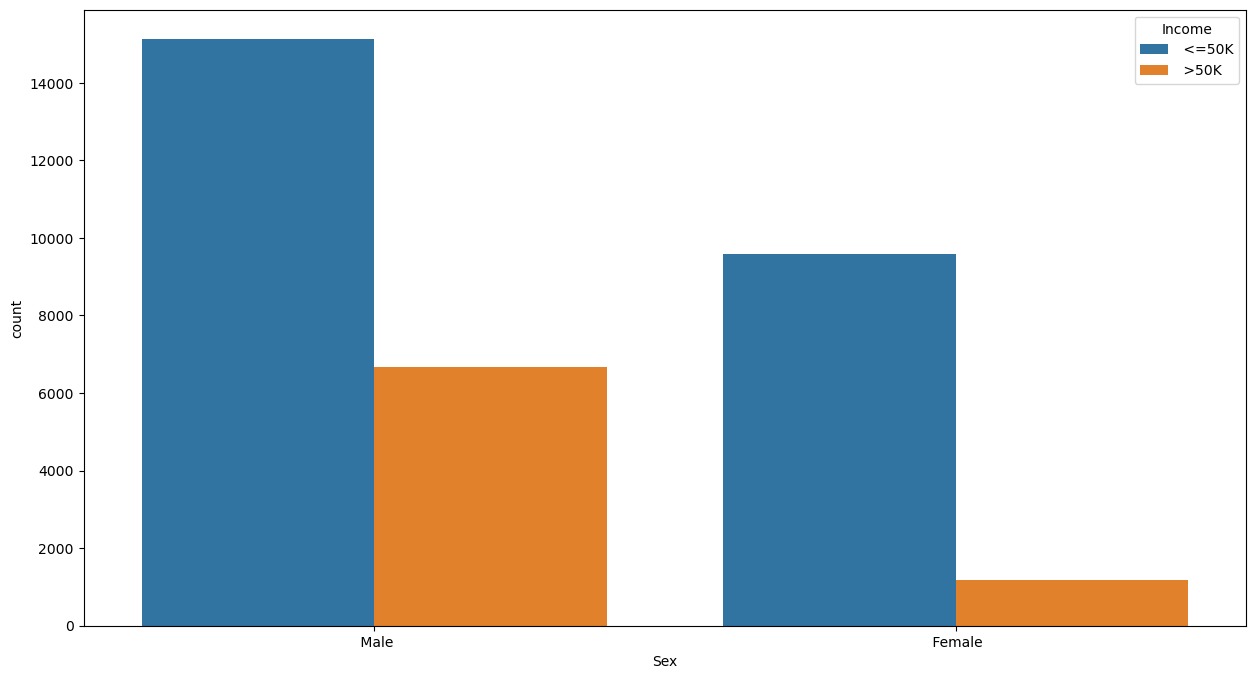

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(df,x='Sex',hue='Income')

<Axes: xlabel='Workclass', ylabel='count'>

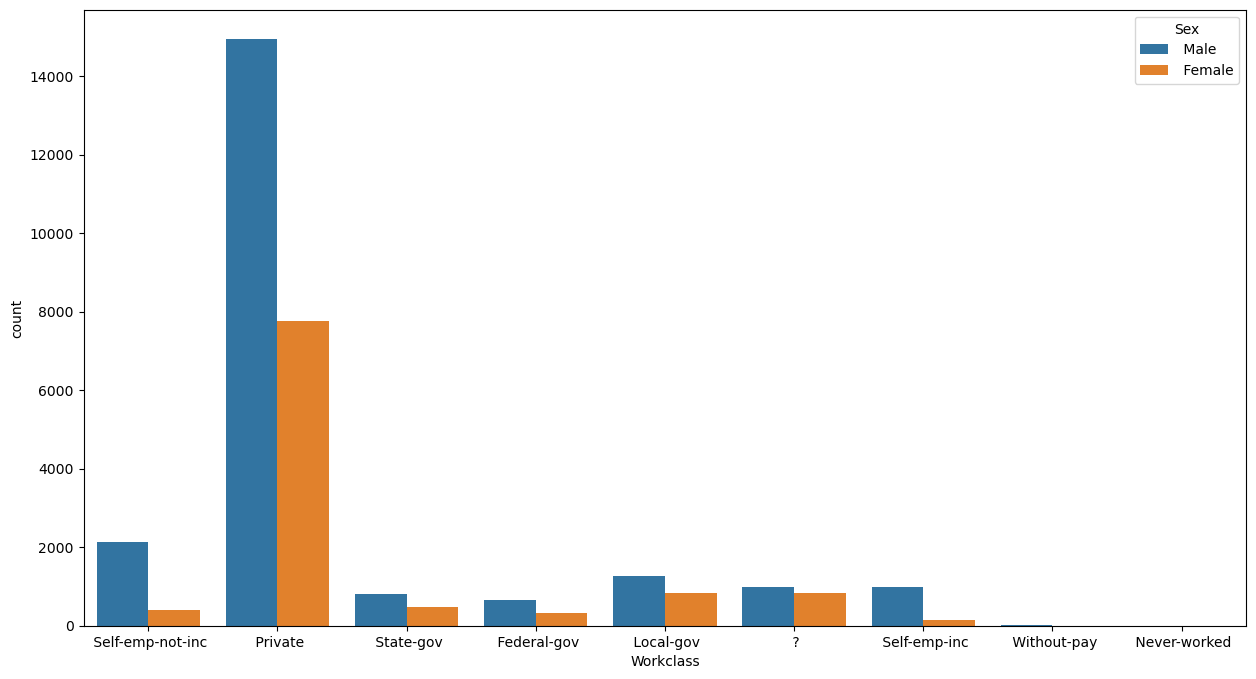

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(df,x='Workclass',hue='Sex')

In [17]:
df['Hours_per_week'].unique()

array([13, 40, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

<Axes: xlabel='Age', ylabel='Hours_per_week'>

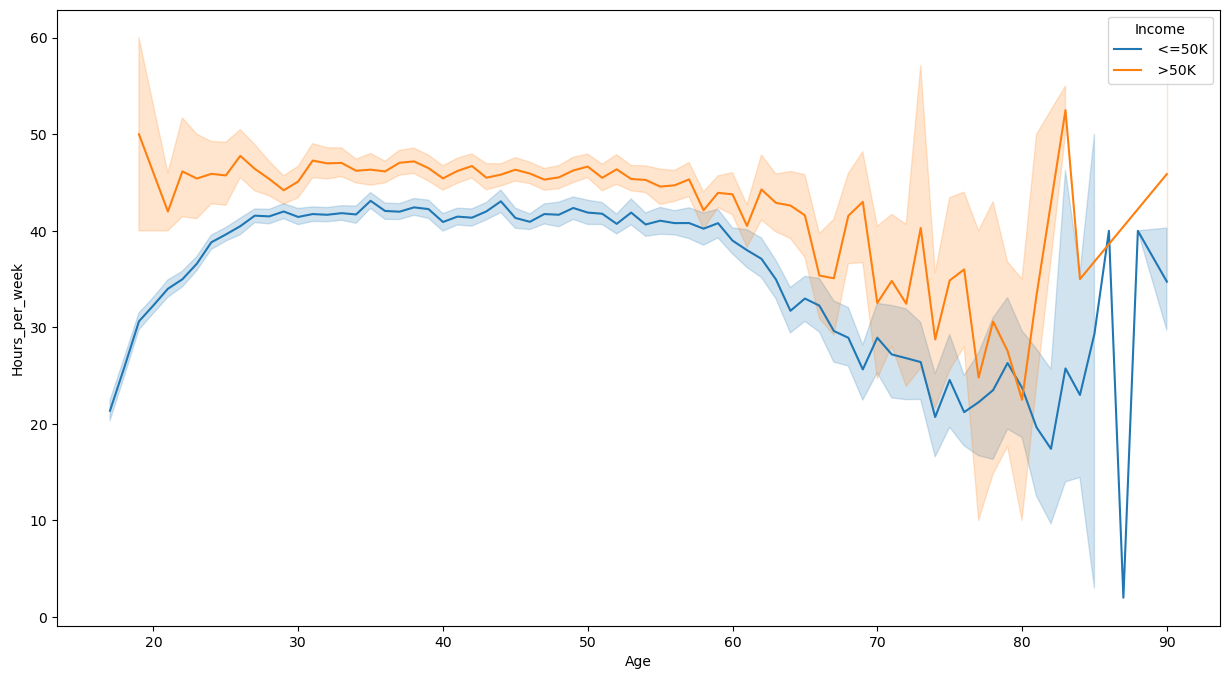

In [18]:
plt.figure(figsize=(15,8))
sns.lineplot(df,x='Age',y='Hours_per_week',hue='Income')

<Axes: xlabel='Education', ylabel='Hours_per_week'>

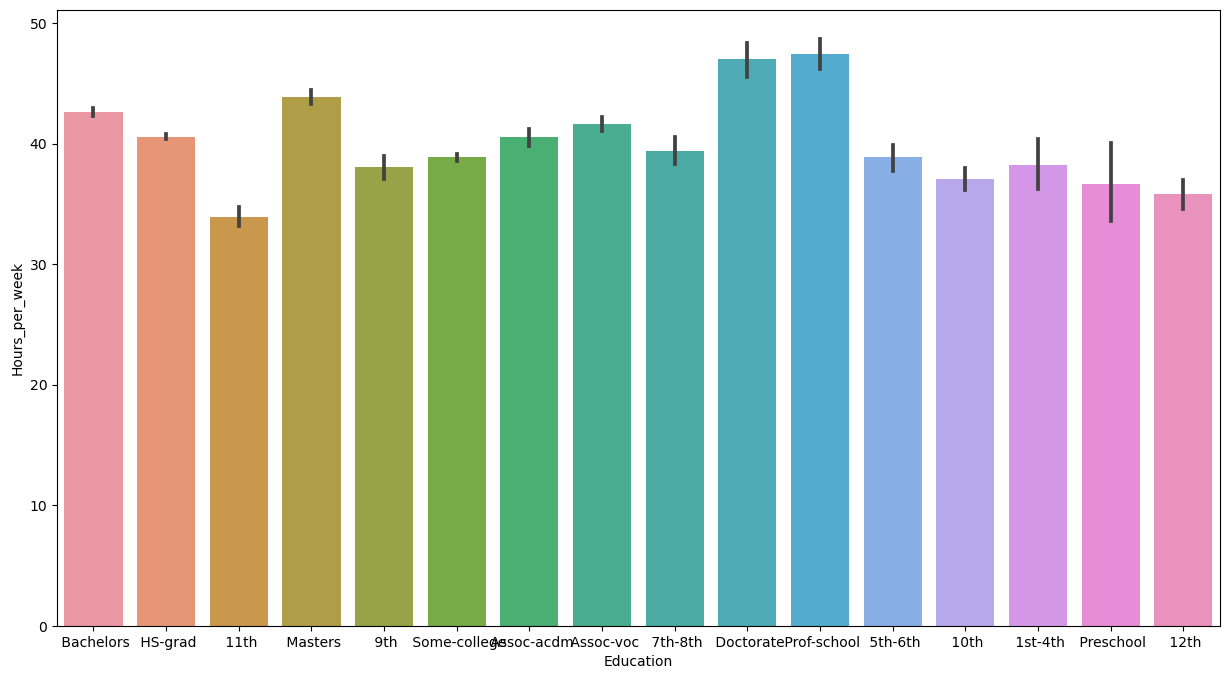

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(df,x='Education',y='Hours_per_week')

In [20]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


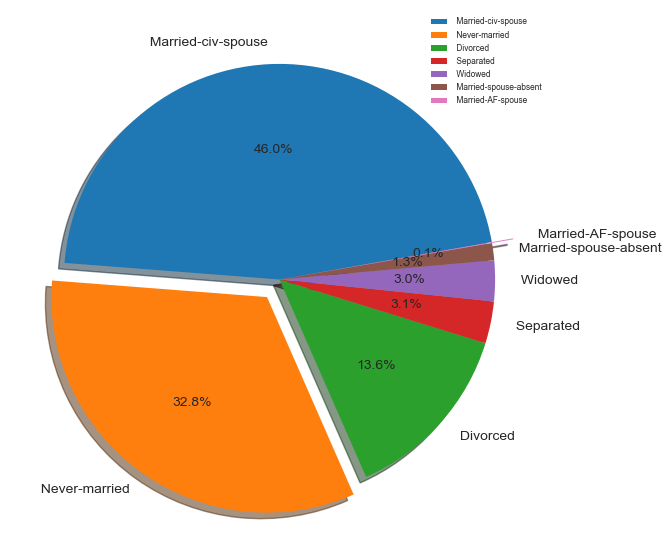

In [21]:
m=df['Marital_status'].value_counts()
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(8,7))
plt.pie(m.values,labels=m.index,startangle=10, explode=(
    0, 0.1, 0, 0, 0, 0, 0.1), shadow=True, autopct='%1.1f%%')
plt.legend()
plt.legend(prop={'size':6})

In [22]:
h=df['Education'].value_counts()
h

Education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

(-1.1010979670090872,
 1.1232925627564059,
 -1.1046375801483552,
 1.1973892364897394)

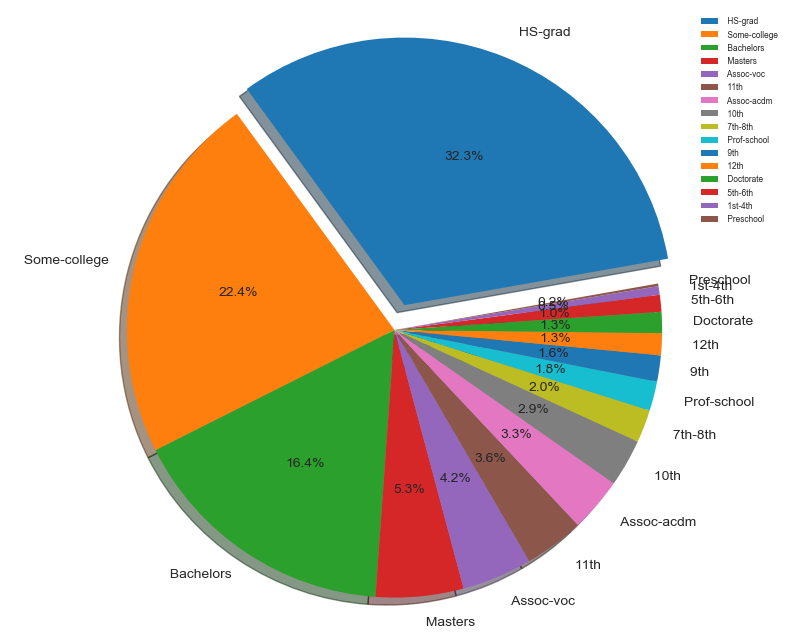

In [23]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10,8))
plt.pie(df['Education'].value_counts().values,labels=df['Education'].value_counts().index,startangle=10,explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0),shadow=True,autopct='%1.1f%%')
plt.legend()
plt.legend(prop={'size':6})
plt.axis('equal')

<Axes: xlabel='Native_country', ylabel='count'>

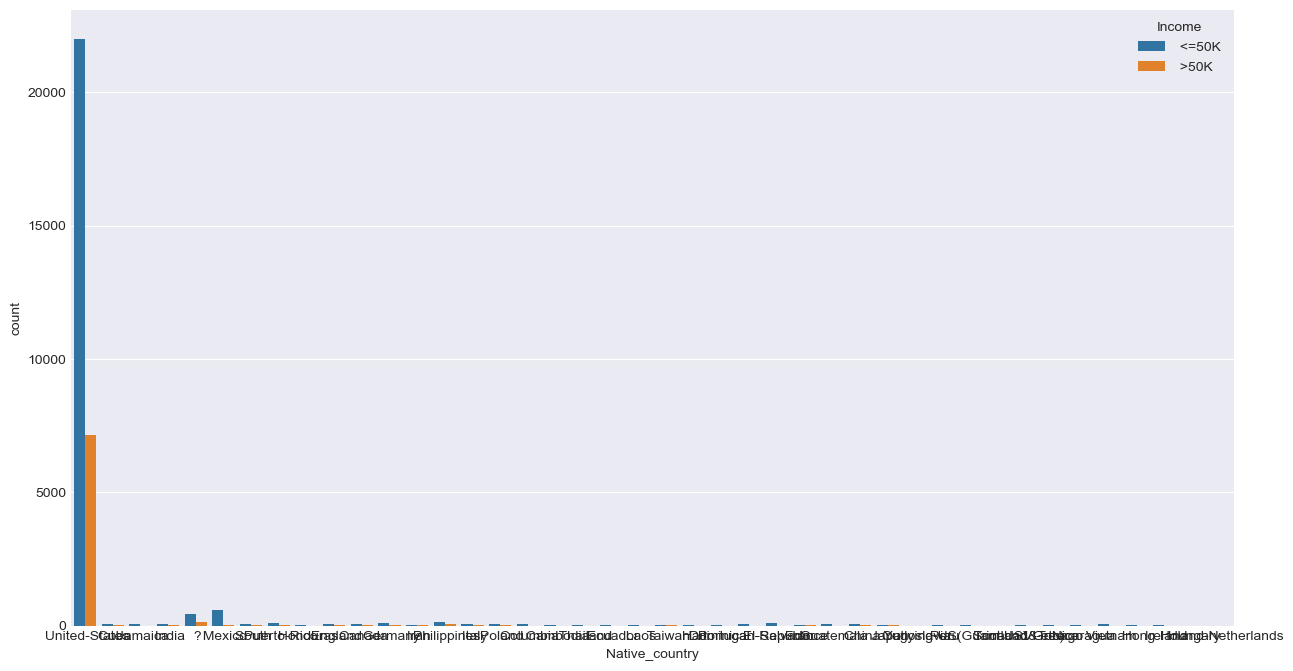

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(df,x='Native_country',hue='Income')

In [25]:
cat_col=[]
num_col=[]
for i in df.columns.tolist():
    if df[i].dtypes=='int64' or df[i].dtypes=='float64':
        num_col.append(i)
    if df[i].dtypes=='O':
        cat_col.append(i)
print(cat_col)
print('\n')
print(num_col)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [26]:
for i in cat_col:
    print(i)
    print(df[i].mode()[0])
    print('*'*25)

Workclass
 Private
*************************
Education
 HS-grad
*************************
Marital_status
 Married-civ-spouse
*************************
Occupation
 Prof-specialty
*************************
Relationship
 Husband
*************************
Race
 White
*************************
Sex
 Male
*************************
Native_country
 United-States
*************************
Income
 <=50K
*************************


In [27]:
df['Workclass']=df['Workclass'].replace(r'\?','Private',regex=True)

In [28]:
df['Occupation']=df['Occupation'].replace(r'\?','Prof-specialty',regex=True)
df['Native_country']=df['Native_country'].replace(r'\?','United-States',regex=True)

In [29]:
df['Workclass'].value_counts()

Workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [31]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,5,2925,9,12,2,3,0,4,1,0,0,12,38,0
1,21,3,14085,11,8,0,5,1,4,1,0,0,39,38,0
2,36,3,15335,1,6,2,5,0,2,1,0,0,39,38,0
3,11,3,19354,9,12,2,9,5,2,0,0,0,39,4,0
4,20,3,17699,12,13,2,3,5,4,0,0,0,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,3,16527,7,11,2,12,5,4,0,0,0,37,38,0
32556,23,3,8079,11,8,2,6,0,4,1,0,0,39,38,1
32557,41,3,7882,11,8,6,0,4,4,0,0,0,39,38,0
32558,5,3,12880,11,8,4,0,3,4,1,0,0,19,38,0


In [32]:
df['Income'].value_counts()

Income
0    24719
1     7841
Name: count, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
X=df.drop('Income',axis=1)
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,33,5,2925,9,12,2,3,0,4,1,0,0,12,38
1,21,3,14085,11,8,0,5,1,4,1,0,0,39,38
2,36,3,15335,1,6,2,5,0,2,1,0,0,39,38
3,11,3,19354,9,12,2,9,5,2,0,0,0,39,4
4,20,3,17699,12,13,2,3,5,4,0,0,0,39,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,3,16527,7,11,2,12,5,4,0,0,0,37,38
32556,23,3,8079,11,8,2,6,0,4,1,0,0,39,38
32557,41,3,7882,11,8,6,0,4,4,0,0,0,39,38
32558,5,3,12880,11,8,4,0,3,4,1,0,0,19,38


In [35]:
y=df['Income']
y


0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)



In [52]:
model={'LogisticRegression':LogisticRegression(random_state=42),
       'DecisionTreeeClassifier':DecisionTreeClassifier(random_state=42),
       'RandomForestClassier':RandomForestClassifier(random_state=42),
      'AdaBoostClassifier':AdaBoostClassifier(random_state=42),
       'GradientBoostingClassifier':GradientBoostingClassifier(random_state=42),
       'ExtraTreesClassifier':ExtraTreesClassifier(),'SVC':SVC(),
       'KNeighorsClassifier':KNeighborsClassifier(),
       'GaussianNB':GaussianNB(),'MultinomialNB':MultinomialNB(),
      'XGBClassifier':XGBClassifier(random_state=42)}
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
model_accuracies={}
for i,j in model.items():
    j.fit(X_train,y_train)
    j.score(X_train,y_train)
    pred=j.predict(X_test)
    acc=accuracy_score(y_test,pred)
    con=confusion_matrix(y_test,pred)
    model_accuracies[j] = acc
    print('Accuracy Score of ',j,' is :',acc)
    print('Confusion_matrix :',con)
    print(classification_report(y_test,pred))
    print('\n')

Accuracy Score of  LogisticRegression(random_state=42)  is : 0.7370550161812298
Confusion_matrix : [[5413 1996]
 [1904 5519]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      7409
           1       0.73      0.74      0.74      7423

    accuracy                           0.74     14832
   macro avg       0.74      0.74      0.74     14832
weighted avg       0.74      0.74      0.74     14832



Accuracy Score of  DecisionTreeClassifier(random_state=42)  is : 0.8540992448759439
Confusion_matrix : [[6272 1137]
 [1027 6396]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7409
           1       0.85      0.86      0.86      7423

    accuracy                           0.85     14832
   macro avg       0.85      0.85      0.85     14832
weighted avg       0.85      0.85      0.85     14832



Accuracy Score of  RandomForestClassifier(random_state=42)  is : 0.892259978425027
Con

In [40]:
best_model = max(model_accuracies, key=model_accuracies.get)

print("Best model:", best_model)
print("Accuracy score:", model_accuracies[best_model])

Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Accuracy score: 0.8992044228694714


In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'gamma': [0, 0.25, 0.5, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
xgb = XGBClassifier()
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)
best_model_score = best_model.score(X_test, y_test)
print("Best model accuracy:", best_model_score)

Best hyperparameters: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 0.9}
Best model accuracy: 0.8994741100323624


In [55]:
best_param=grid_search.best_params_

In [56]:
xgb=XGBClassifier(**best_param)
xgb.fit(X_train,y_train)
predclff=xgb.predict(X_test)
acc=accuracy_score(y_test,predclff)
con=confusion_matrix(y_test,predclff)
print(f'Accuracy Score : {acc}')
print(f'Confusion Matrix : {con}')
print(classification_report(y_test,predclff))

Accuracy Score : 0.8994741100323624
Confusion Matrix : [[6690  719]
 [ 772 6651]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7409
           1       0.90      0.90      0.90      7423

    accuracy                           0.90     14832
   macro avg       0.90      0.90      0.90     14832
weighted avg       0.90      0.90      0.90     14832

